In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
# Mounting Google Drive to access the dataset file

In [2]:
# Load the dataset


data = pd.read_csv("LGEN Indices.csv",sep=",")
data.head()

# Remove NaN values
data_cleaned = data.dropna()

# Display the first few rows of the cleaned DataFrame
print("\nAfter removing NaN values:")
print(data_cleaned.head())



After removing NaN values:
         Date        Open        High         Low       Close  LGEN.L  Close  \
0  04/01/2022  299.600006  305.100006  298.500000  305.100006     262.251526   
1  05/01/2022  305.000000  305.399994  301.500000  302.299988     259.844727   
2  06/01/2022  297.200012  301.700012  295.257996  300.000000     257.867737   
3  07/01/2022  300.299988  307.799988  299.399994  307.799988     264.572296   
4  10/01/2022  308.000000  309.399994  304.000000  305.399994     262.509369   

   LGEN.L Volume  PUK Close  PUK Volume  FTSE 100 Price  
0       13942388  33.691139      294600         7615.54  
1        6747955  34.026234      315400         7622.16  
2       12440000  33.059250      313900         7630.57  
3       14644031  33.432644      272100         7666.31  
4       10812533  34.399620      252000         7632.74  


In [3]:
# Display summary statistics
summary_stats = data_cleaned.describe()
print(summary_stats)

             Open        High         Low       Close  LGEN.L  Close  \
count  524.000000  524.000000  524.000000  524.000000     524.000000   
mean   246.751431  249.669632  243.768582  246.537897     229.624441   
std     20.684657   20.841950   20.582629   20.570703      12.705889   
min    202.600006  207.100006  191.369003  204.100006     187.856750   
25%    229.699997  232.149998  227.399994  229.300003     220.524368   
50%    247.750000  250.949997  244.399994  246.899994     229.229408   
75%    258.600006  261.084992  255.800003  258.324990     237.674217   
max    308.600006  311.128998  304.500000  307.799988     264.572296   

       LGEN.L Volume   PUK Close    PUK Volume  FTSE 100 Price  
count   5.240000e+02  524.000000  5.240000e+02      524.000000  
mean    1.701845e+07   25.192952  6.655897e+05     7491.873855  
std     8.820741e+06    3.849719  3.559169e+05      228.695151  
min     3.107120e+06   17.841909  2.222000e+05     6826.150000  
25%     1.101830e+07   21.

In [4]:
# Subset containing closing prices for LGEN.L and PUK
closing_prices_subset = data_cleaned[['LGEN.L  Close', 'PUK Close', 'FTSE 100 Price']]

print(closing_prices_subset)


     LGEN.L  Close  PUK Close  FTSE 100 Price
0       262.251526  33.691139         7615.54
1       259.844727  34.026234         7622.16
2       257.867737  33.059250         7630.57
3       264.572296  33.432644         7666.31
4       262.509369  34.399620         7632.74
..             ...        ...             ...
519     255.500000  21.133871         7491.37
520     253.800003  20.926966         7445.25
521     256.299988  20.375219         7485.28
522     255.000000  20.582123         7450.37
523     250.899994  20.995934         7516.87

[524 rows x 3 columns]


In [5]:

# Summary statistics for 'LGEN.L Close' and 'PUK Close'
summary_stats1 = closing_prices_subset[['LGEN.L  Close', 'PUK Close','FTSE 100 Price']].describe()
# Round the summary statistics to two decimal places using DataFrame.round()
summary_stats1_rounded = summary_stats1.round(2)

print(summary_stats1_rounded)

       LGEN.L  Close  PUK Close  FTSE 100 Price
count         524.00     524.00          524.00
mean          229.62      25.19         7491.87
std            12.71       3.85          228.70
min           187.86      17.84         6826.15
25%           220.52      21.90         7375.21
50%           229.23      24.77         7500.04
75%           237.67      27.86         7627.12
max           264.57      34.95         8014.31


In [6]:
import pandas as pd
from tabulate import tabulate

# Calculate returns for 'LGEN.L Close', 'PUK Close', and 'FTSE 100 Price'
closing_prices_subset['LGEN.L Return'] = closing_prices_subset['LGEN.L  Close'].pct_change()
closing_prices_subset['PUK Return'] = closing_prices_subset['PUK Close'].pct_change()
closing_prices_subset['FTSE 100 Price Return'] = closing_prices_subset['FTSE 100 Price'].pct_change()

# Summary statistics for 'LGEN.L Close', 'PUK Close', and 'FTSE 100 Price' including returns
summary_stats1 = closing_prices_subset[['LGEN.L  Close', 'LGEN.L Return', 'PUK Close', 'PUK Return', 'FTSE 100 Price', 'FTSE 100 Price Return']].describe()

# Round the summary statistics to six decimal places using DataFrame.round()
summary_stats1_rounded = summary_stats1.round(5)

# Convert the DataFrame to a beautiful table
table = tabulate(summary_stats1_rounded, headers='keys', tablefmt='fancy_grid')

# Print the table
print(table)


╒═══════╤═════════════════╤═════════════════╤═════════════╤══════════════╤══════════════════╤═════════════════════════╕
│       │   LGEN.L  Close │   LGEN.L Return │   PUK Close │   PUK Return │   FTSE 100 Price │   FTSE 100 Price Return │
╞═══════╪═════════════════╪═════════════════╪═════════════╪══════════════╪══════════════════╪═════════════════════════╡
│ count │        524      │       523       │   524       │    523       │          524     │               523       │
├───────┼─────────────────┼─────────────────┼─────────────┼──────────────┼──────────────────┼─────────────────────────┤
│ mean  │        229.624  │         7e-05   │    25.1929  │     -0.00058 │         7491.87  │                 1e-05   │
├───────┼─────────────────┼─────────────────┼─────────────┼──────────────┼──────────────────┼─────────────────────────┤
│ std   │         12.7059 │         0.01774 │     3.84972 │      0.02541 │          228.695 │                 0.00885 │
├───────┼─────────────────┼─────────────

<ipython-input-6-d94a6ef08924>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_prices_subset['LGEN.L Return'] = closing_prices_subset['LGEN.L  Close'].pct_change()
<ipython-input-6-d94a6ef08924>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_prices_subset['PUK Return'] = closing_prices_subset['PUK Close'].pct_change()
<ipython-input-6-d94a6ef08924>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

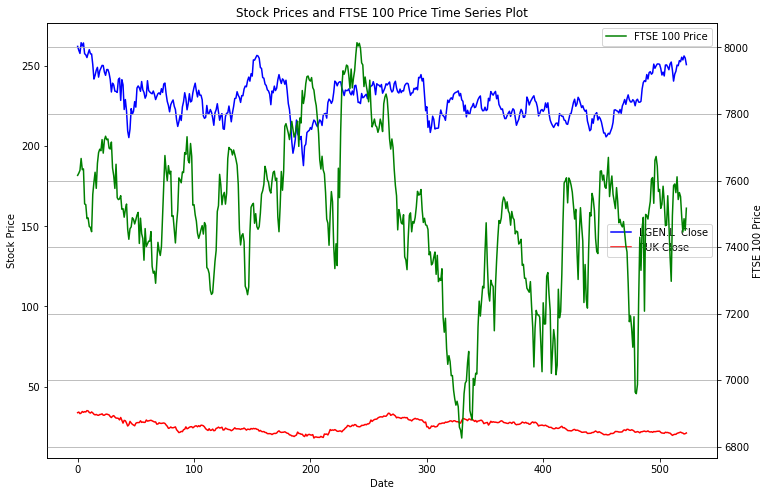

In [7]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot 'LGEN.L Close' and 'PUK Close' on the primary y-axis
plt.plot(data_cleaned.index, data_cleaned['LGEN.L  Close'], label='LGEN.L  Close', color='blue')
plt.plot(data_cleaned.index, data_cleaned['PUK Close'], label='PUK Close', color='red')
plt.legend()

plt.xlabel('Date')
# Set the y-axis label
plt.ylabel('Stock Price')

# Create a secondary y-axis for 'FTSE 100 Price'
ax2 = plt.gca().twinx()
ax2.plot(data_cleaned.index, data_cleaned['FTSE 100 Price'], label='FTSE 100 Price', color='green')
ax2.set_ylabel('FTSE 100 Price')

# Set the x-axis label
plt.xlabel('Date')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set the title
plt.title('Stock Prices and FTSE 100 Price Time Series Plot')

# Show legend
plt.legend()

# Show grid
plt.grid(True)

# Show plot
plt.show()


Summary Statistics:
             Open        High         Low       Close  LGEN.L  Close  \
count  524.000000  524.000000  524.000000  524.000000     524.000000   
mean   246.751431  249.669632  243.768582  246.537897     229.624441   
std     20.684657   20.841950   20.582629   20.570703      12.705889   
min    202.600006  207.100006  191.369003  204.100006     187.856750   
25%    229.699997  232.149998  227.399994  229.300003     220.524368   
50%    247.750000  250.949997  244.399994  246.899994     229.229408   
75%    258.600006  261.084992  255.800003  258.324990     237.674217   
max    308.600006  311.128998  304.500000  307.799988     264.572296   

       LGEN.L Volume   PUK Close    PUK Volume  FTSE 100 Price  
count   5.240000e+02  524.000000  5.240000e+02      524.000000  
mean    1.701845e+07   25.192952  6.655897e+05     7491.873855  
std     8.820741e+06    3.849719  3.559169e+05      228.695151  
min     3.107120e+06   17.841909  2.222000e+05     6826.150000  
25%   

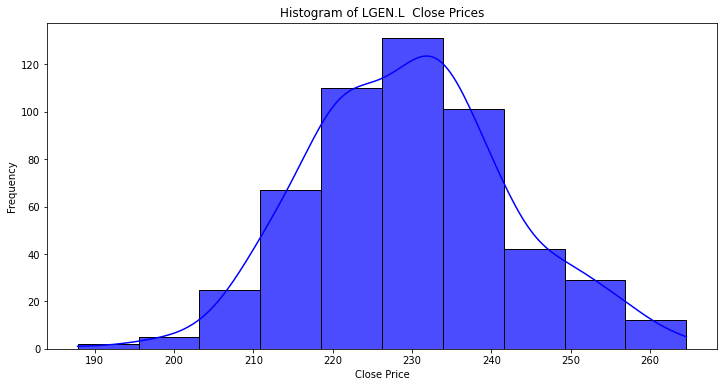

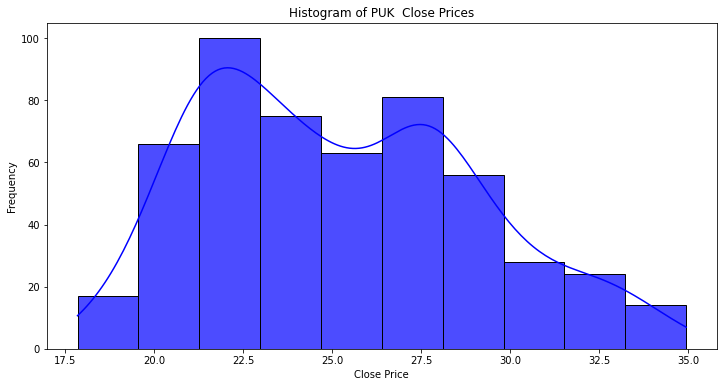

C:\Users\Sci-hub\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


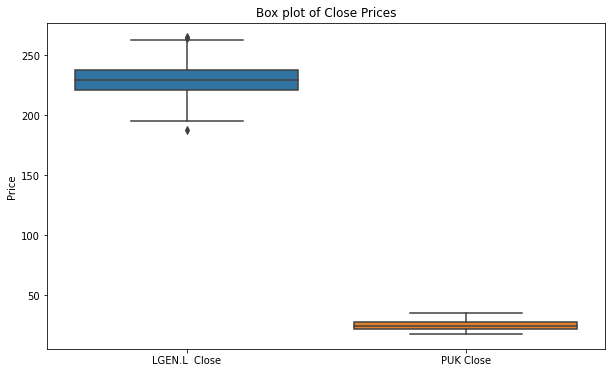

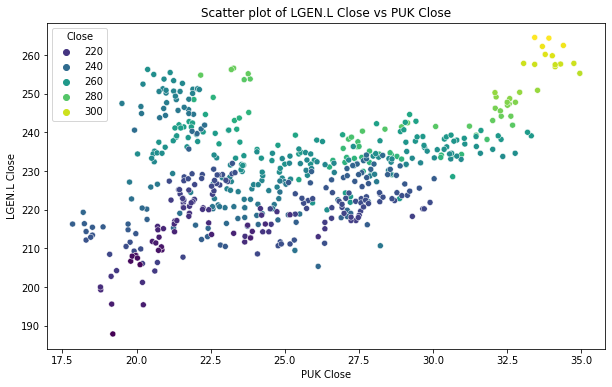

In [8]:



df = pd.DataFrame(data)

# 1. Summary Statistics
print("Summary Statistics:")
print(df.describe())
print("\n")

# 2. Data Visualization
#1 Histograms
plt.figure(figsize=(12, 6))
sns.histplot(df['LGEN.L  Close'], bins=10, kde=True, color='blue', alpha=0.7)
plt.title('Histogram of LGEN.L  Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()


###2
plt.figure(figsize=(12, 6))
sns.histplot(df['PUK Close'], bins=10, kde=True, color='blue', alpha=0.7)
plt.title('Histogram of PUK  Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['LGEN.L  Close', 'PUK Close']])
plt.title('Box plot of Close Prices')
plt.ylabel('Price')
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, y='LGEN.L  Close', x='PUK Close', hue='Close', palette='viridis')
plt.title('Scatter plot of LGEN.L Close vs PUK Close')
plt.xlabel('PUK Close')
plt.ylabel('LGEN.L Close')
plt.show()





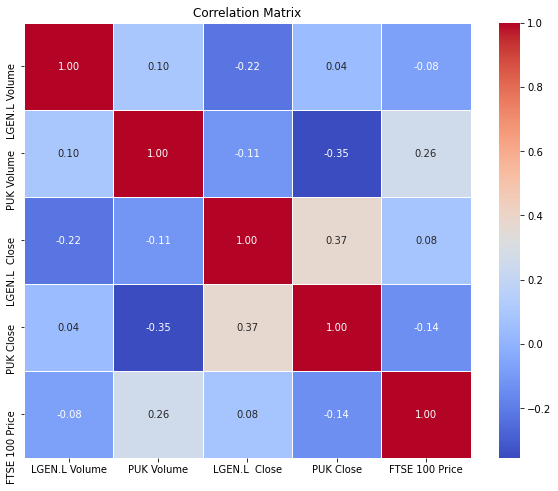

In [97]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Analysis
correlation_matrix = df[['LGEN.L Volume', 'PUK Volume', 'LGEN.L  Close', 'PUK Close','FTSE 100 Price']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [98]:
# 3. Correlation Analysis
correlation_matrix = df[['LGEN.L Volume','PUK Volume', 'LGEN.L  Close', 'PUK Close','FTSE 100 Price']].corr()
print("Correlation Matrix:")
print(correlation_matrix)
print("\n")

Correlation Matrix:
                LGEN.L Volume  PUK Volume  LGEN.L  Close  PUK Close  \
LGEN.L Volume        1.000000    0.099310      -0.224929   0.039791   
PUK Volume           0.099310    1.000000      -0.113461  -0.354238   
LGEN.L  Close       -0.224929   -0.113461       1.000000   0.374834   
PUK Close            0.039791   -0.354238       0.374834   1.000000   
FTSE 100 Price      -0.078302    0.257859       0.082018  -0.140723   

                FTSE 100 Price  
LGEN.L Volume        -0.078302  
PUK Volume            0.257859  
LGEN.L  Close         0.082018  
PUK Close            -0.140723  
FTSE 100 Price        1.000000  




In [101]:
# Calculate returns for 'LGEN.L Close', 'PUK Close', and 'FTSE 100 Price'
returns_df = closing_prices_subset[['LGEN.L  Close', 'PUK Close', 'FTSE 100 Price']].pct_change()

# Compute correlation matrix for returns
returns_correlation_matrix = returns_df.corr()

# Print correlation matrix
print("Correlation Matrix for Stock Returns:")
print(returns_correlation_matrix)


Correlation Matrix for Stock Returns:
                LGEN.L  Close  PUK Close  FTSE 100 Price
LGEN.L  Close        1.000000   0.137579       -0.101234
PUK Close            0.137579   1.000000       -0.026803
FTSE 100 Price      -0.101234  -0.026803        1.000000


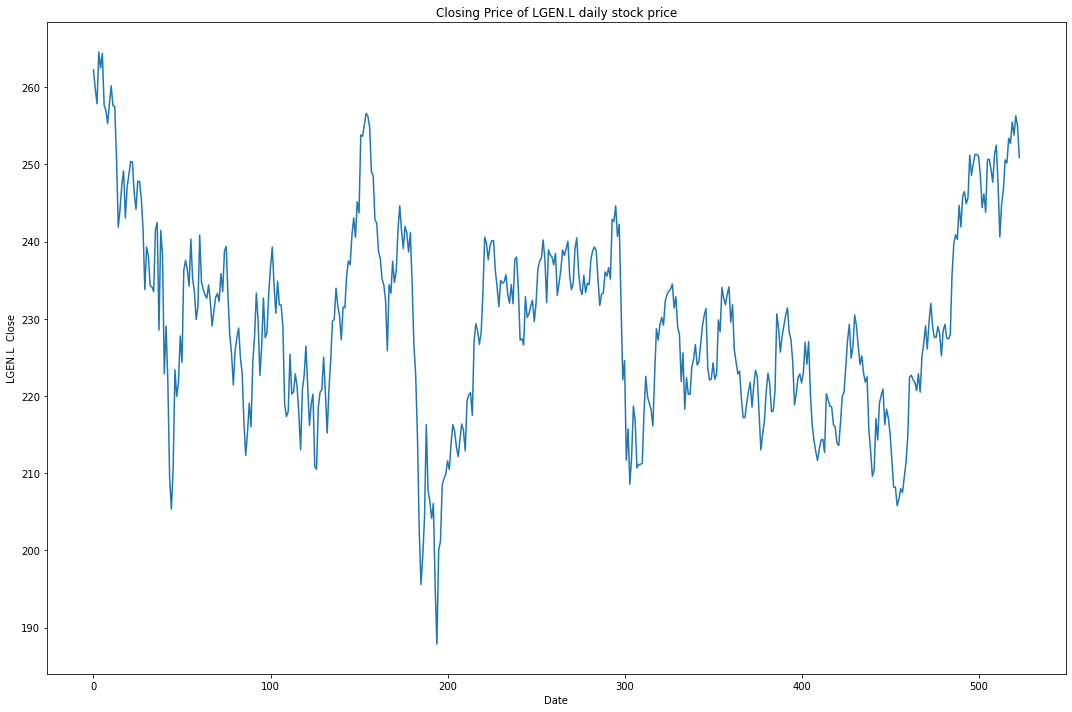

In [14]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
data['LGEN.L  Close'].plot()
plt.ylabel('LGEN.L  Close')
plt.xlabel('Date')
plt.title(f"Closing Price of LGEN.L daily stock price")
    
plt.tight_layout()

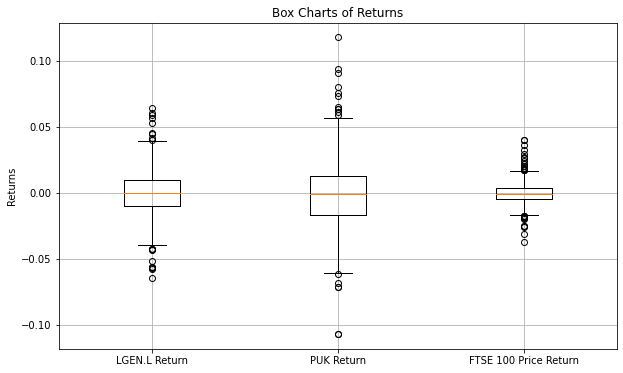

In [15]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot box charts for returns
plt.boxplot([
    closing_prices_subset['LGEN.L Return'].dropna(),
    closing_prices_subset['PUK Return'].dropna(),
    closing_prices_subset['FTSE 100 Price Return'].dropna()
], labels=['LGEN.L Return', 'PUK Return', 'FTSE 100 Price Return'])

# Set the y-axis label
plt.ylabel('Returns')

# Set the title
plt.title('Box Charts of Returns')

# Show grid
plt.grid(True)

# Show plot
plt.show()


<ipython-input-16-3b893eaa0a4c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_prices_subset['LGEN.L Return'] = closing_prices_subset['LGEN.L  Close'].pct_change()


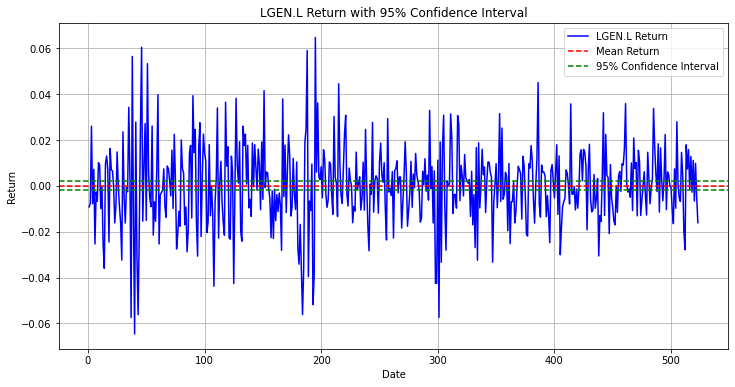

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate returns for 'LGEN.L Close'
closing_prices_subset['LGEN.L Return'] = closing_prices_subset['LGEN.L  Close'].pct_change()

# Compute mean and standard deviation of returns
mean_return = closing_prices_subset['LGEN.L Return'].mean()
std_dev = closing_prices_subset['LGEN.L Return'].std()

# Compute 95% confidence interval
confidence_interval = 2.576 * std_dev / np.sqrt(len(closing_prices_subset['LGEN.L Return']))

# Plot time series chart of returns
plt.figure(figsize=(12, 6))
plt.plot(closing_prices_subset.index, closing_prices_subset['LGEN.L Return'], label='LGEN.L Return', color='blue')
plt.axhline(y=mean_return, color='red', linestyle='--', label='Mean Return')
plt.axhline(y=mean_return + confidence_interval, color='green', linestyle='--', label='95% Confidence Interval')
plt.axhline(y=mean_return - confidence_interval, color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('LGEN.L Return with 95% Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()


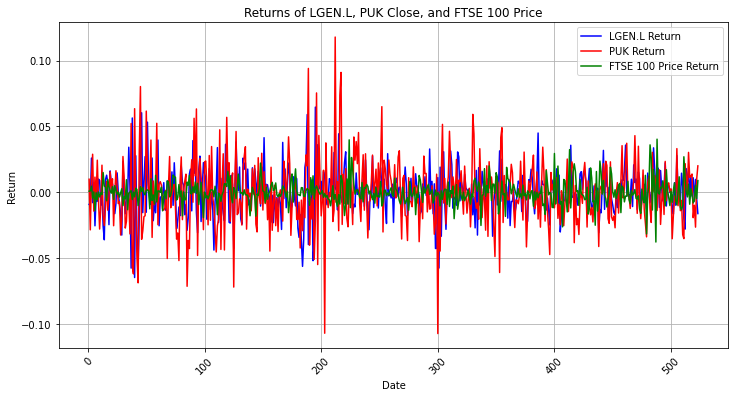

In [83]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the returns for 'LGEN.L', 'PUK Close', and 'FTSE 100 Price'
plt.plot(closing_prices_subset.index, closing_prices_subset['LGEN.L Return'], label='LGEN.L Return', color='blue')
plt.plot(closing_prices_subset.index, closing_prices_subset['PUK Return'], label='PUK Return', color='red')
plt.plot(closing_prices_subset.index, closing_prices_subset['FTSE 100 Price Return'], label='FTSE 100 Price Return', color='green')

# Set the y-axis label
plt.ylabel('Return')

# Set the x-axis label
plt.xlabel('Date')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set the title
plt.title('Returns of LGEN.L, PUK Close, and FTSE 100 Price')

# Show legend
plt.legend()

# Show grid
plt.grid(True)

# Show plot
plt.show()


***Regression modelling***


In [103]:
import statsmodels.api as sm

# Define the independent variables
X = closing_prices_subset[['FTSE 100 Price', 'PUK Close']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Define the dependent variable
y = closing_prices_subset['LGEN.L  Close']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          LGEN.L  Close   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     49.26
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           2.54e-20
Time:                        20:28:18   Log-Likelihood:                -2029.7
No. Observations:                 524   AIC:                             4065.
Df Residuals:                     521   BIC:                             4078.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            139.6210     17.691      7.

***Moving average forecasting***

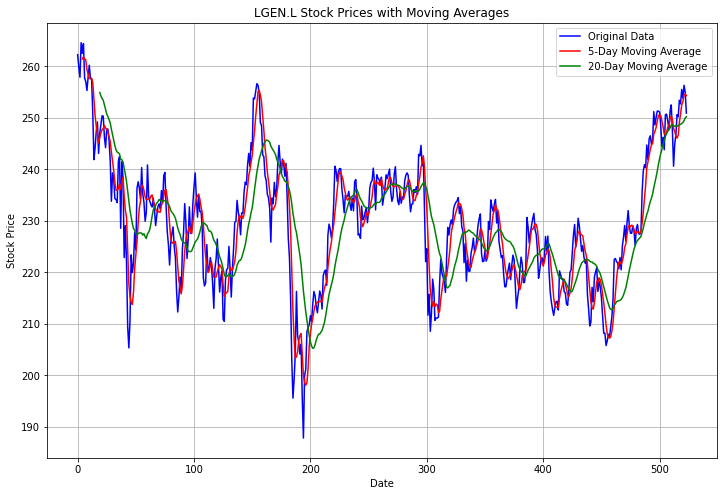

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing LGEN.L stock prices

# Calculate the 5-day and 20-day moving averages
df['5-Day MA'] = df['LGEN.L  Close'].rolling(window=5).mean()
df['20-Day MA'] = df['LGEN.L  Close'].rolling(window=20).mean()

# Plotting
plt.figure(figsize=(12, 8))

# Original dataset
plt.plot(df.index, df['LGEN.L  Close'], label='Original Data', color='blue')

# 5-day moving average
plt.plot(df.index, df['5-Day MA'], label='5-Day Moving Average', color='red')

# 20-day moving average
plt.plot(df.index, df['20-Day MA'], label='20-Day Moving Average', color='green')

# Add title and labels
plt.title('LGEN.L Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


***ERROR measures for MA***

In [132]:
import numpy as np

# Assuming 'forecast' is the forecasted values and 'actual' is the actual values
# Replace 'forecast' and 'actual' with your actual variable names

# Calculate the differences between forecast and actual
forecast = df['20-Day MA']  # Assuming '5-Day MA' contains forecasted values
actual = df['LGEN.L  Close']  # Assuming 'LGEN.L  Close' contains actual values

# Mean Squared Error (MSE)
mse = np.mean((forecast - actual) ** 2)

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(forecast - actual))

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 73.88221376882055
Mean Absolute Error (MAE): 6.657001505445544


In [133]:
import numpy as np

# Assuming 'forecast' is the forecasted values and 'actual' is the actual values
# Replace 'forecast' and 'actual' with your actual variable names

# Calculate the differences between forecast and actual
forecast = df['5-Day MA']  # Assuming '5-Day MA' contains forecasted values
actual = df['LGEN.L  Close']  # Assuming 'LGEN.L  Close' contains actual values

# Mean Squared Error (MSE)
mse = np.mean((forecast - actual) ** 2)

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(forecast - actual))

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 17.988863635278722
Mean Absolute Error (MAE): 3.202961196923077


In [134]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Assuming 'data' is your DataFrame containing the 'LGEN.L' data
# Replace 'data' with your actual DataFrame name

# Extract the 'LGEN.L' data
lgen_data = data['LGEN.L  Close']

# Perform exponential smoothing
smoothed_data = SimpleExpSmoothing(lgen_data).fit(smoothing_level=0.2, optimized=False).fittedvalues

# Add the smoothed data back to your DataFrame
data['Smoothed LGEN.L'] = smoothed_data

# Print the first few rows of the DataFrame to verify the results
print(data.head())


         Date        Open        High         Low       Close  LGEN.L  Close  \
0  04/01/2022  299.600006  305.100006  298.500000  305.100006     262.251526   
1  05/01/2022  305.000000  305.399994  301.500000  302.299988     259.844727   
2  06/01/2022  297.200012  301.700012  295.257996  300.000000     257.867737   
3  07/01/2022  300.299988  307.799988  299.399994  307.799988     264.572296   
4  10/01/2022  308.000000  309.399994  304.000000  305.399994     262.509369   

   LGEN.L Volume  PUK Close  PUK Volume  FTSE 100 Price    5-Day MA  \
0     13942388.0  33.691139    294600.0         7615.54         NaN   
1      6747955.0  34.026234    315400.0         7622.16         NaN   
2     12440000.0  33.059250    313900.0         7630.57         NaN   
3     14644031.0  33.432644    272100.0         7666.31         NaN   
4     10812533.0  34.399620    252000.0         7632.74  261.409131   

   20-Day MA        MA-5  SES Forecast  DES Forecast  TES Forecast  \
0        NaN         N

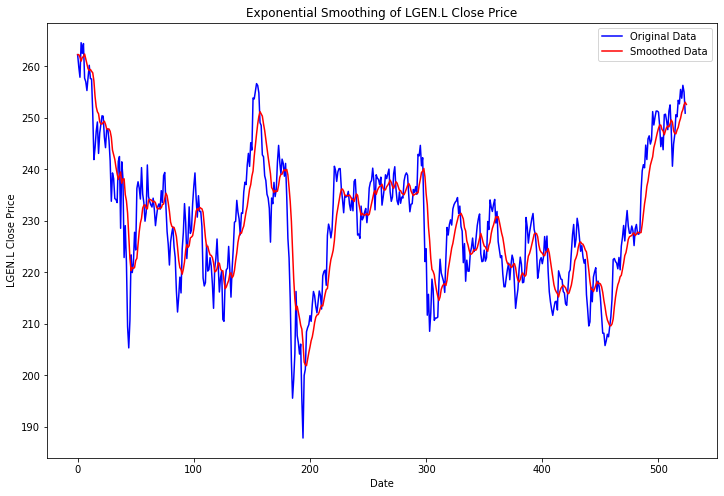

In [138]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(12, 8))

# Plot original 'LGEN.L' data
plt.plot(data.index, data['LGEN.L  Close'], label='Original Data', color='blue')

# Plot smoothed 'LGEN.L' data
plt.plot(data.index, data['Smoothed LGEN.L'], label='Smoothed Data', color='red')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('LGEN.L Close Price')
plt.title('Exponential Smoothing of LGEN.L Close Price')
plt.legend()

# Show plot
plt.show()


In [151]:
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = np.mean((data['Smoothed LGEN.L'] - data['LGEN.L  Close']) ** 2)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(data['Smoothed LGEN.L'] - data['LGEN.L  Close']))

# Print accuracy measures
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 37.32904125780122
Mean Absolute Error (MAE): 4.625629441474124


C:\Users\Sci-hub\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Fitted values: 0      263.076679
1      263.072553
2      263.056414
3      263.030470
4      263.038180
          ...    
520    231.476705
521    231.588322
522    231.711880
523    231.828321
524    231.923679
Length: 525, dtype: float64


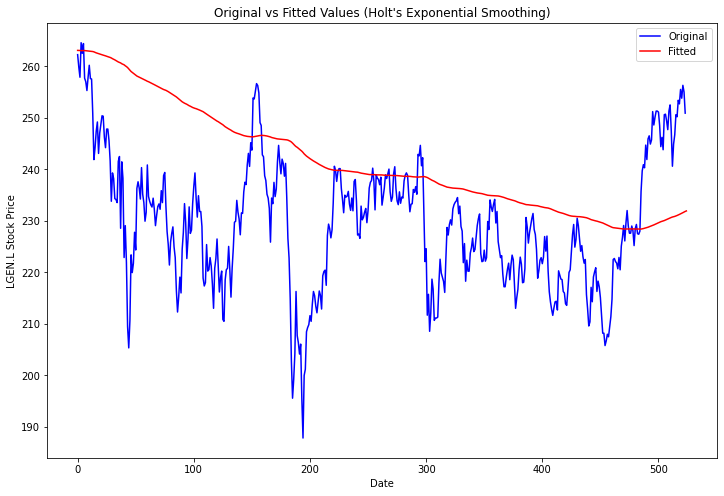

In [143]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming 'data' is your DataFrame containing the 'LGEN.L' stock prices
# Replace 'data' with your actual DataFrame name

# Extract the 'LGEN.L' stock prices
lgen_prices = data['LGEN.L  Close']

# Fit Holt's Exponential Smoothing model
model = ExponentialSmoothing(lgen_prices)
fitted_model = model.fit()

# Get the fitted values
fitted_values = fitted_model.fittedvalues

# Print the fitted values
print("Fitted values:", fitted_values)

import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 8))

# Plot the original 'LGEN.L' stock prices
plt.plot(data.index, lgen_prices, label='Original', color='blue')

# Plot the fitted values
plt.plot(data.index, fitted_values, label='Fitted', color='red')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('LGEN.L Stock Price')
plt.title('Original vs Fitted Values (Holt\'s Exponential Smoothing)')
plt.legend()

# Show plot
plt.show()



In [150]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np

# Assuming 'data' is your DataFrame containing the 'LGEN.L' stock prices
# Replace 'data' with your actual DataFrame name

# Extract the 'LGEN.L' stock prices
lgen_prices = data['LGEN.L  Close']

# Fit Holt's Exponential Smoothing model
model = ExponentialSmoothing(lgen_prices)
fitted_model = model.fit()

# Get the fitted values
fitted_values = fitted_model.fittedvalues

# Calculate Mean Squared Error (MSE)
mse = np.mean((lgen_prices - fitted_values) ** 2)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(lgen_prices - fitted_values))

# Print accuracy measures
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 342.3892664141039
Mean Absolute Error (MAE): 14.936361652469596


C:\Users\Sci-hub\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [152]:
import pandas as pd

# Create a DataFrame with the provided data
data = {
    'Year': ['2020', '2021', '2022', '2023'],
    'Long Term Debt (Billion $)': [7.134, 6.873, 7.613, 7.613],
    'Change from Previous Year (%)': [None, -1.01, -3.65, 10.75]
}

df = pd.DataFrame(data)

# Set 'Year' column as index
df.set_index('Year', inplace=True)

# Display the DataFrame
print(df)


      Long Term Debt (Billion $)  Change from Previous Year (%)
Year                                                           
2020                       7.134                            NaN
2021                       6.873                          -1.01
2022                       7.613                          -3.65
2023                       7.613                          10.75
